In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
# scrape populations:

page = 'http://worldpopulationreview.com/countries/switzerland-population/'

response = requests.get(page, timeout=100)
print(response)

pop = BeautifulSoup(response.content, "html.parser")

pop_1 = pop.find('div',{'class':'inside-body-content-container clearfix'}).find('div',{'style':'overflow-x:auto'}).find('table',{'class':'table table-striped'}).find('tbody').findAll('tr')
pop_1

<Response [200]>


[<tr><td>Zurich</td><td>341,730</td></tr>,
 <tr><td>Geneve</td><td>183,981</td></tr>,
 <tr><td>Basel</td><td>164,488</td></tr>,
 <tr><td>Bern</td><td>121,631</td></tr>,
 <tr><td>Lausanne</td><td>116,751</td></tr>,
 <tr><td>Winterthur</td><td>91,908</td></tr>,
 <tr><td>Sankt Gallen</td><td>70,572</td></tr>,
 <tr><td>Lugano</td><td>63,000</td></tr>,
 <tr><td>Luzern</td><td>57,066</td></tr>,
 <tr><td>Zuerich (Kreis 11)</td><td>54,260</td></tr>,
 <tr><td>Biel/Bienne</td><td>48,614</td></tr>,
 <tr><td>Zuerich (Kreis 3)</td><td>46,018</td></tr>,
 <tr><td>Zuerich (Kreis 9)</td><td>44,878</td></tr>,
 <tr><td>Thun</td><td>42,136</td></tr>,
 <tr><td>Koniz</td><td>37,196</td></tr>,
 <tr><td>La Chaux-de-Fonds</td><td>36,825</td></tr>,
 <tr><td>Zuerich (Kreis 10)</td><td>36,216</td></tr>,
 <tr><td>Rapperswil</td><td>34,776</td></tr>,
 <tr><td>Schaffhausen</td><td>33,863</td></tr>,
 <tr><td>Zuerich (Kreis 7)</td><td>33,820</td></tr>]

In [3]:
# write data in df
cities = []
pops = []

for i in range(0,len(pop_1)):
    curr_list = pop_1[i].findAll('td')
    curr_city = curr_list[0].get_text()
    curr_pop = int(curr_list[1].get_text().replace(',',''))    
    cities.append(curr_city)
    pops.append(curr_pop)
    
df_pop = pd.DataFrame(columns = ['city','population'])
df_pop['city'] = cities
df_pop['population'] = pops
df_pop

,city,population
0,Zurich,341730
1,Geneve,183981
2,Basel,164488
3,Bern,121631
4,Lausanne,116751
5,Winterthur,91908
6,Sankt Gallen,70572
7,Lugano,63000
8,Luzern,57066
9,Zuerich (Kreis 11),54260


In [4]:
# remove 'Zuerich' 
remove_word = 'Zuerich'

ix_list = []
for x in range(0,len(df_pop)):
        curr_result = df_pop['city'][x].find(remove_word)
        if curr_result >= 0:
            ix_list.append(1)
        elif curr_result < 0:
            ix_list.append(0)
            
df_pop['ix'] = ix_list

In [5]:
df_pop_filt = df_pop[df_pop['ix']==0].reset_index()
del df_pop_filt['ix']
df_pop_filt

,index,city,population
0,0,Zurich,341730
1,1,Geneve,183981
2,2,Basel,164488
3,3,Bern,121631
4,4,Lausanne,116751
5,5,Winterthur,91908
6,6,Sankt Gallen,70572
7,7,Lugano,63000
8,8,Luzern,57066
9,10,Biel/Bienne,48614


In [7]:
Number_mi_super = [67,30,34,35,46,27,12,16,17,7,10,30,5,7,10]
df_pop_filt['MIGROS_super'] = Number_mi_super
df_pop_filt.sort_values('population', ascending = False)

,index,city,population,MIGROS_super
0,0,Zurich,341730,67
1,1,Geneve,183981,30
2,2,Basel,164488,34
3,3,Bern,121631,35
4,4,Lausanne,116751,46
5,5,Winterthur,91908,27
6,6,Sankt Gallen,70572,12
7,7,Lugano,63000,16
8,8,Luzern,57066,17
9,10,Biel/Bienne,48614,7


In [8]:
ratio_M = []

for j in range(0,len(df_pop_filt)):
    curr_ratio= int(df_pop_filt['population'][j]) / df_pop_filt['MIGROS_super'][j]
    ratio_M.append(curr_ratio)
    
df_pop_filt['density'] = ratio_M
df_pop_filt = df_pop_filt.sort_values('density', ascending=True).reset_index()


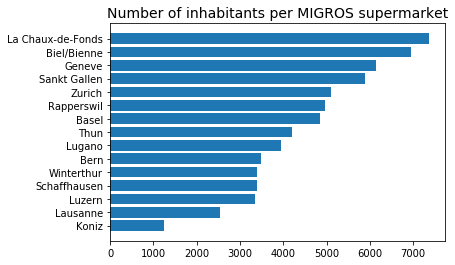

In [9]:
plt.barh(df_pop_filt['city'], df_pop_filt['density'])
plt.title('Number of inhabitants per MIGROS supermarket', fontsize=14)
plt.savefig('MIGROS.png',quality=100,bbox_inches = 'tight')

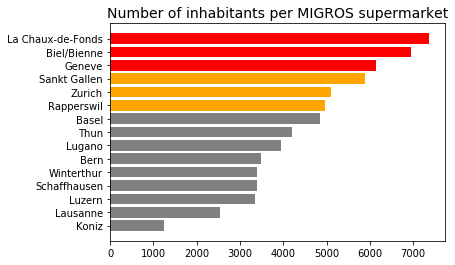

In [12]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','orange','orange','orange','red','red','red']

plt.barh(df_pop_filt['city'], df_pop_filt['density'],color=color)
plt.title('Number of inhabitants per MIGROS supermarket', fontsize=14)

plt.savefig('MIGROS_color.png',quality=100,bbox_inches = 'tight')
